# Produce time-ordered files for BAM-SIF and SM1/2 data

In [1]:
import glob
import re as regex

In [2]:
dataroot = "../datasets/sif_fits/"  # all the SIF files are here (simlink)

In [3]:
# grab the paths
sm1path = glob.glob(dataroot+"*/*SM1*CDP_NONE.fits")  # There are a few CLOCKING ones there - can I use them?
sm2path = glob.glob(dataroot+"*/*SM2*CDP_NONE.fits")
bampath = glob.glob(dataroot+"*/*ROW_1_BAM*CLOCKING*")

# remove the ../
sm1path = [p[3:] for p in sm1path]
sm2path = [p[3:] for p in sm2path]
bampath = [p[3:] for p in bampath]

# sort them
# problem: just applying the standard "sorted" function does not work
# -> it sorts by date, but then picks up on the ROW, I need OBMT!

getobmt = lambda x: int(regex.search("(?<=OBMT_START_)[0-9]+",x).group(0))

sm1path.sort(key=getobmt)
sm2path.sort(key=getobmt)
bampath.sort(key=getobmt) # note: I think this contains some stuff besides our images with patterns

In [4]:
# write everyting into files

filenames = ["filenames_sm1.txt", "filenames_sm2.txt", "filenames_bam-sif.txt"]
pathlists = [sm1path, sm2path, bampath]

for ii in range(len(pathlists)):
    file = open(filenames[ii], 'w')
    pathlist = pathlists[ii
                        ]
    for path in pathlist:
        file.write("%s\n" % path)
        
    file.close()

In [4]:
# the bam files still contain non-pattern stuff. Let's see what we can do
# let's try to get the correct length in AL and AC

from astropy.io import fits

allens = []
aclens = []
times = []
bampath_new = []
for ii in range(len(bampath)):
    head = fits.getheader('../'+bampath[ii])
    times.append(getobmt(bampath[ii]))
    allens.append(head['NAXIS2'])
    aclens.append(head['NAXIS1'])
    if (allens[-1] == 4599 and aclens[-1] == 162):
        bampath_new.append(bampath[ii])

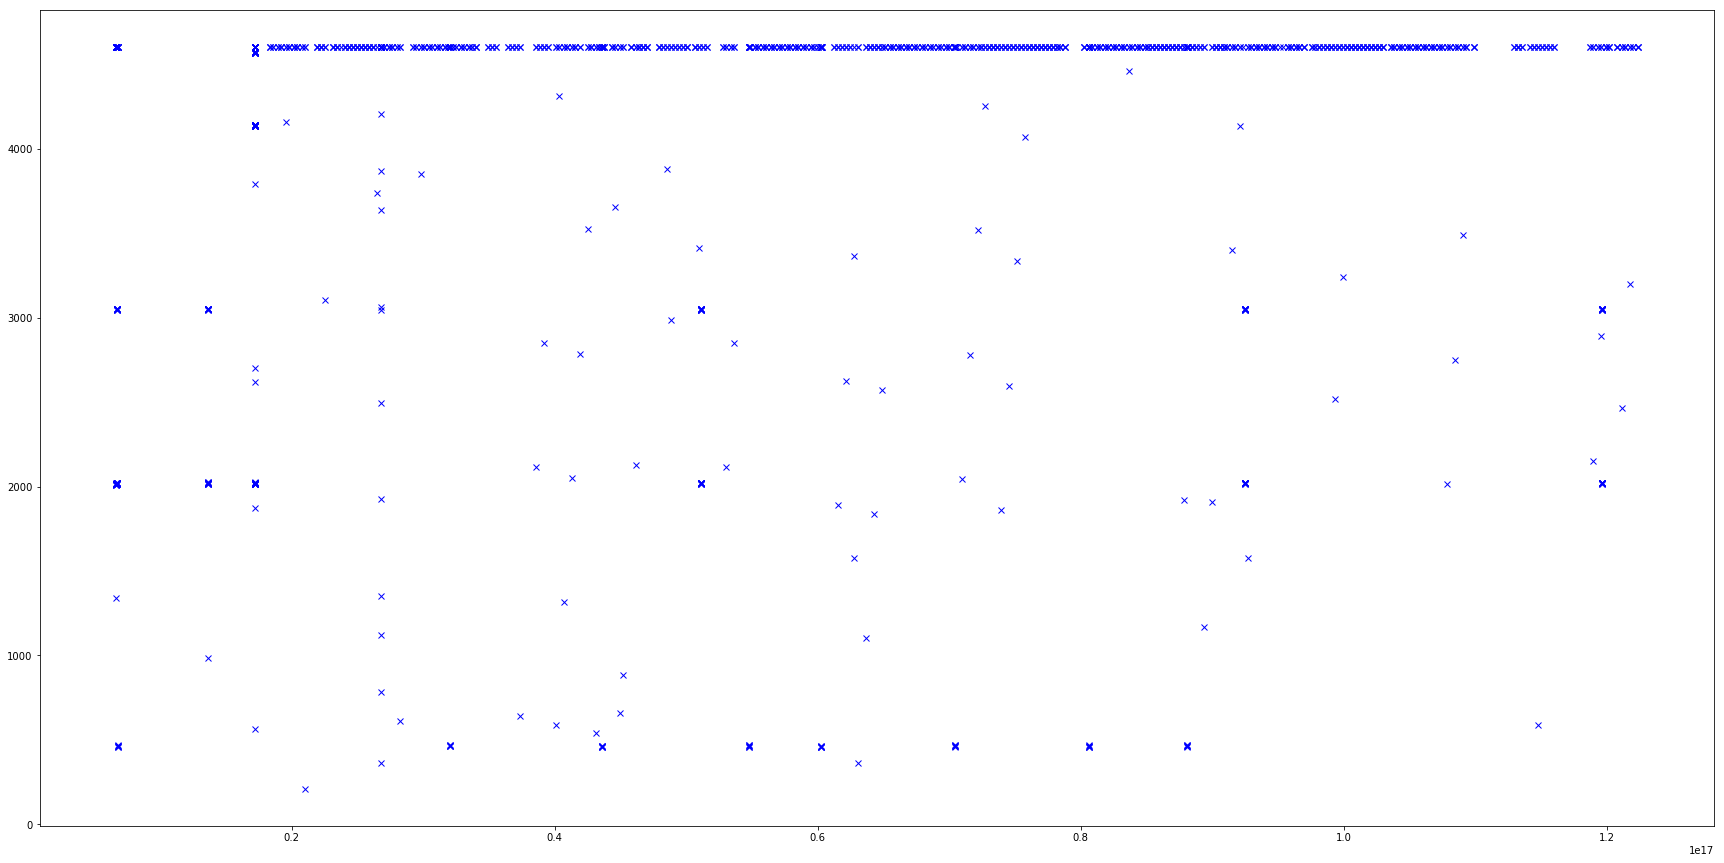

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(times,allens,'bx')
fig = plt.gcf()
fig.set_size_inches(30,15)
plt.show()

In [9]:
# save the new bampath file

file = open('filenames_bam-sif_new.txt', 'w')
for path in bampath_new:
    file.write("%s\n" % path)
        
file.close()

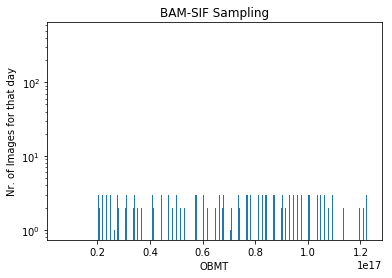

Total images: 1484


In [10]:
times = [getobmt(path) for path in bampath_new]

# find a common binning
t0 = min(times)
t1 = max(times)

# OBMT is in ns and I want approx. daily binning
NBINS=int((t1-t0)/1e9/3600/24)+1
#NBINS=int((t1-t0)/1e9/3600/24/30)+1 # try monthly!
bins = np.linspace(t0,t1,NBINS,endpoint=True)

plt.title("BAM-SIF Sampling")
plt.xlabel("OBMT")
plt.ylabel("Nr. of Images for that day")
histbam = plt.hist(times, bins=bins,log=True)
plt.show()

print("Total images:", len(times))

Looks very reasonable!